In [1]:
from datetime import datetime
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pytz
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from twitter_fetcher.tweet_features import TweetFeatures

In [2]:
# read in the extracted features from CSV file (and parse the tweet created_at column as the index)
features_filename = "master_features.csv"
features_df = pd.read_csv(features_filename, header=0, parse_dates=['created_at'], index_col='created_at')
features_df = features_df.sort_index()

In [3]:
features_df.shape

(8200, 4)

In [4]:
features_df.dtypes

id             int64
source        object
is_retweet      bool
text_len       int64
dtype: object

In [5]:
features_df.index

DatetimeIndex(['2019-07-06 12:11:18+00:00', '2019-07-06 12:11:34+00:00',
               '2019-07-06 12:12:57+00:00', '2019-07-06 12:13:19+00:00',
               '2019-07-06 12:13:25+00:00', '2019-07-06 12:17:46+00:00',
               '2019-07-06 12:21:26+00:00', '2019-07-06 12:33:07+00:00',
               '2019-07-06 12:34:53+00:00', '2019-07-06 12:35:52+00:00',
               ...
               '2020-04-23 23:35:48+00:00', '2020-04-23 23:54:54+00:00',
               '2020-04-24 04:17:52+00:00', '2020-04-24 04:18:10+00:00',
               '2020-04-24 04:20:37+00:00', '2020-04-24 04:27:46+00:00',
               '2020-04-24 04:28:01+00:00', '2020-04-24 04:28:43+00:00',
               '2020-04-24 04:29:53+00:00', '2020-04-24 04:30:24+00:00'],
              dtype='datetime64[ns, UTC]', name='created_at', length=8200, freq=None)

In [6]:
features_df.head()

,id,source,is_retweet,text_len
created_at,,,,
2019-07-06 12:11:18+00:00,1147478123593785344,"<a href=""http://twitter.com/download/iphone"" r...",False,87
2019-07-06 12:11:34+00:00,1147478190857818112,"<a href=""http://twitter.com/download/iphone"" r...",True,38
2019-07-06 12:12:57+00:00,1147478539320643584,"<a href=""http://twitter.com/download/iphone"" r...",True,144
2019-07-06 12:13:19+00:00,1147478632732024833,"<a href=""http://twitter.com/download/iphone"" r...",True,140
2019-07-06 12:13:25+00:00,1147478654458454016,"<a href=""http://twitter.com/download/iphone"" r...",True,68


## Autocorrelation (grouped by hour)

In [7]:
hourly_grouped = features_df['id'].resample('H').count()
# hourly_grouped

C:\Users\dashu\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


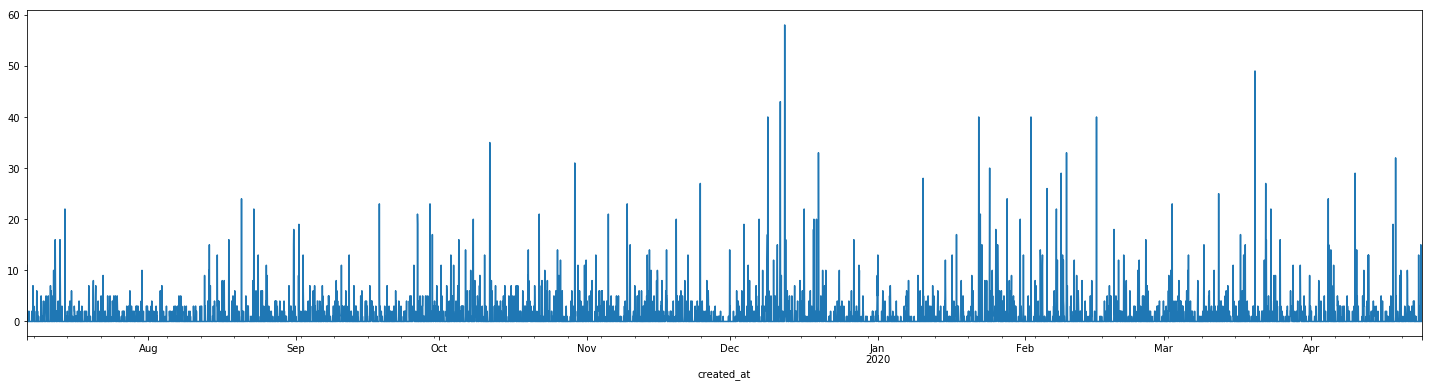

In [8]:
hourly_grouped.plot(kind='line', figsize=(25,6))

In [9]:
# fig, ax = plt.subplots(figsize=(10,8))
# pd.plotting.autocorrelation_plot(hourly_grouped, ax)
# ax.set_xlim(0, 170)
# ax.axvline(24)
# ax.axvline(48)
# ax.axvline(72)
# ax.axvline(96)
# ax.axvline(120)
# ax.axvline(144)
# ax.axvline(168)
# plt.show()

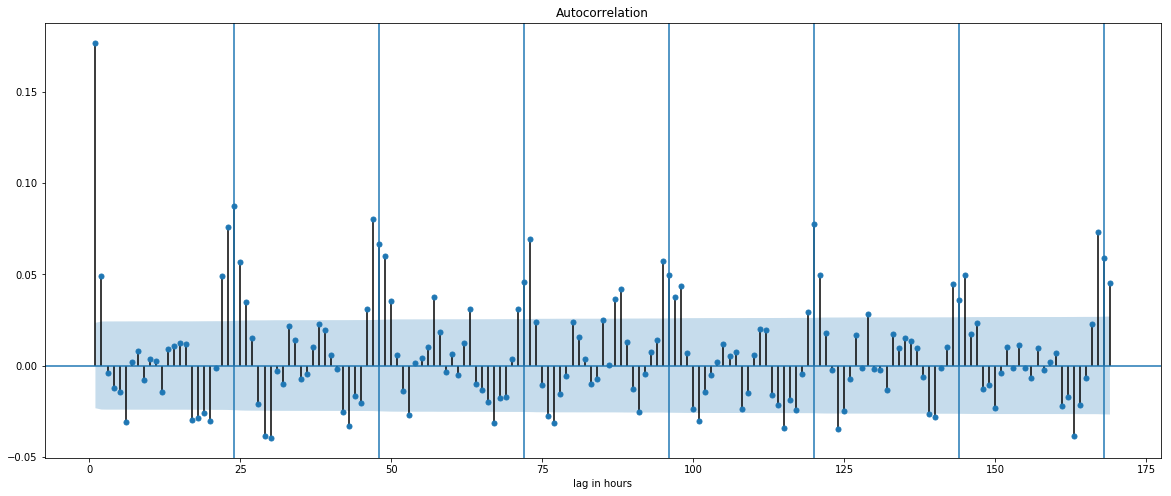

In [10]:
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(hourly_grouped, ax, lags=np.arange(1,170))
ax.axvline(24)
ax.axvline(48)
ax.axvline(72)
ax.axvline(96)
ax.axvline(120)
ax.axvline(144)
ax.axvline(168)
plt.xlabel('lag in hours')
plt.show()

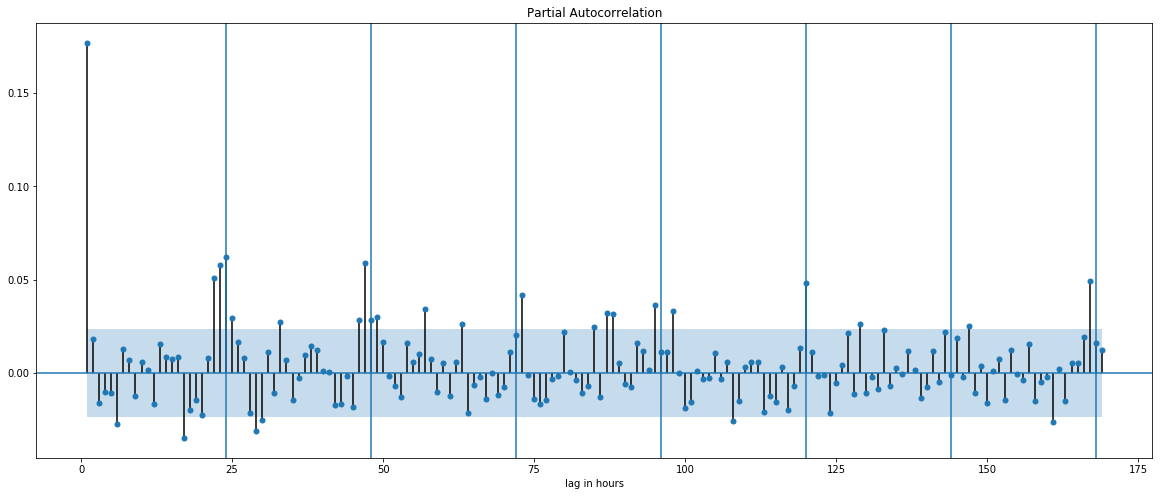

In [11]:
fig, ax = plt.subplots(figsize=(20,8))
plot_pacf(hourly_grouped, ax, lags=np.arange(1,170))
ax.axvline(24)
ax.axvline(48)
ax.axvline(72)
ax.axvline(96)
ax.axvline(120)
ax.axvline(144)
ax.axvline(168)
plt.xlabel('lag in hours')
plt.show()

## Autocorrelation (grouped by minute)

In [12]:
minute_grouped = features_df['id'].resample('min').count()
# minute_grouped

C:\Users\dashu\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


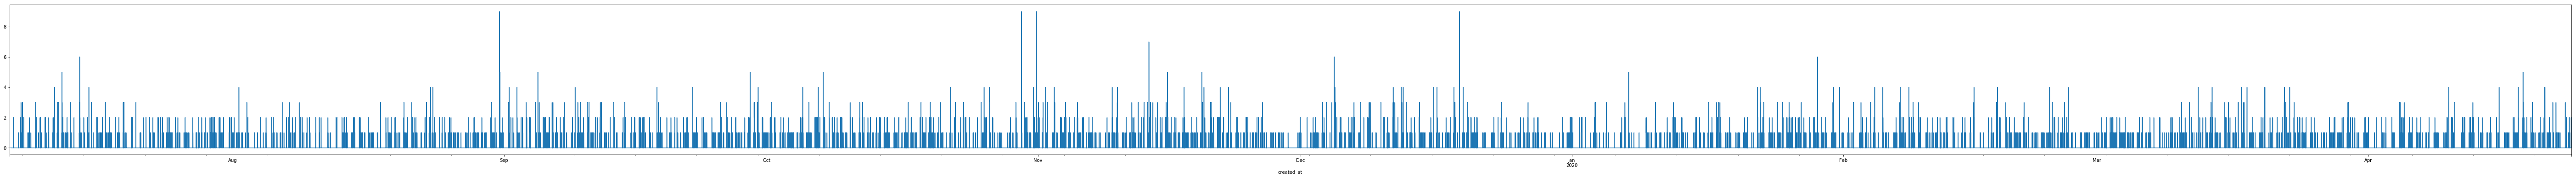

In [13]:
minute_grouped.plot(kind='line', figsize=(100,6))

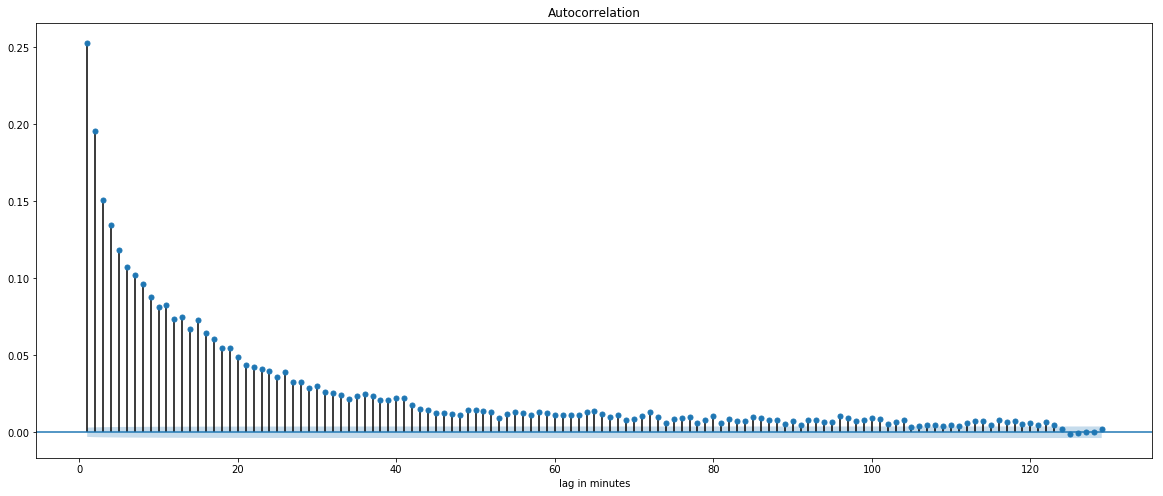

In [14]:
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(minute_grouped, ax, lags=np.arange(1,130))
plt.xlabel('lag in minutes')
plt.show()

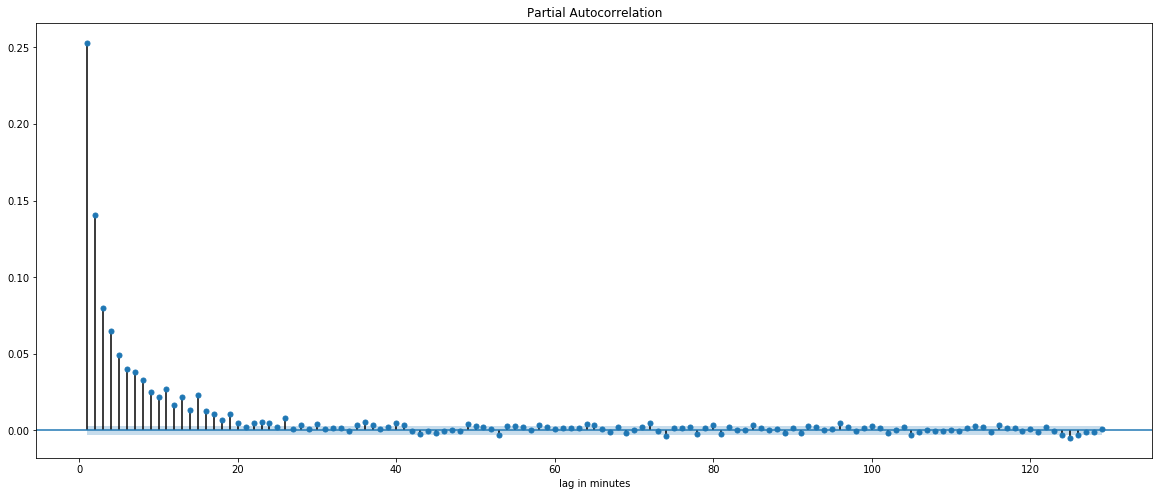

In [15]:
fig, ax = plt.subplots(figsize=(20,8))
plot_pacf(minute_grouped, ax, lags=np.arange(1,130))
plt.xlabel('lag in minutes')
plt.show()

## Autocorrelation (grouped by day)

In [16]:
daily_grouped = features_df['id'].resample('D').count()
# daily_grouped

C:\Users\dashu\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


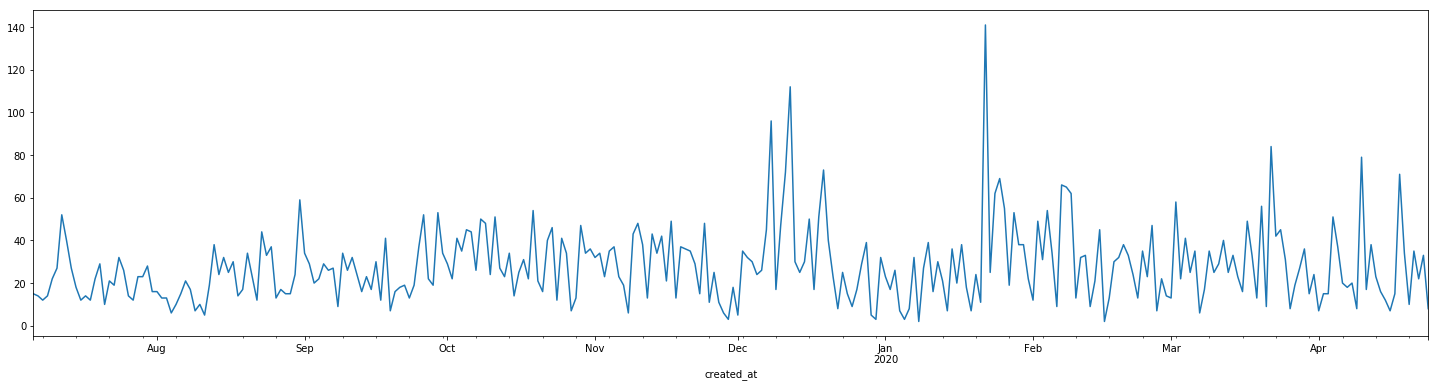

In [17]:
daily_grouped.plot(kind='line', figsize=(25,6))

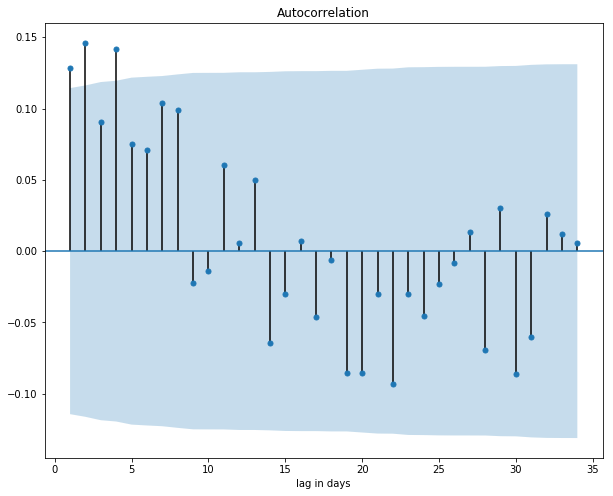

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
plot_acf(daily_grouped, ax, lags=np.arange(1,35))
plt.xlabel('lag in days')
plt.show()

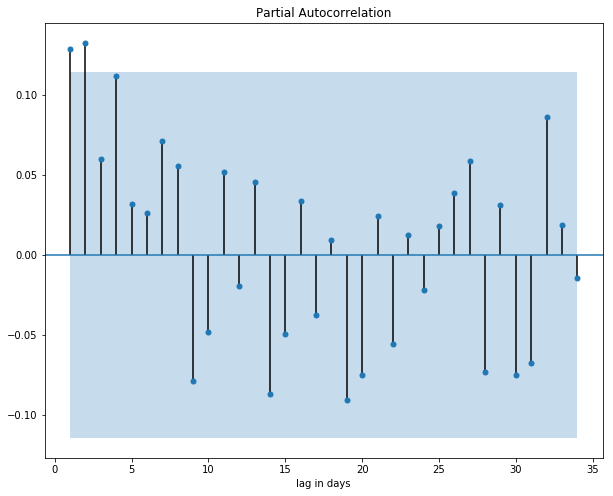

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
plot_pacf(daily_grouped, ax, lags=np.arange(1,35))
plt.xlabel('lag in days')
plt.show()

## Conclusion

The hour-grouping partial autocorrelation graph shows the strongest correlation at a lag of 1 hour, but there are also some statistically signficant correlations (alpha = 0.05) with lags of 22-24, 47, 73, 95, and 120 hours (which are roughly 1, 2, 3, 4, and 5 days). There is also a statistically significant correlation (again, alpha = 0.05) with a lag of 167 hours (roughly 1 week), but this evidence is relatively weak compared to the correlation at a lag of 1 hour. In other words, this partial auto-correlation plot most strongly supports a theory that the pattern of tweeting is "bursty" instead of having strong daily or weekly seasonality/frequency.

The minute-grouping partial autocorrelation graph also shows very strong correlation at a lag of 1 minute, further supporting the "bursty" tweeting pattern theory. Additionally, because the correlation drops to basically statistically insignificant amounts after a lag of greater than 20-30 minutes (and does not spike at a lag of about 60 minutes), this further provides evidence against the tweeting pattern having some hourly seasonality/frequency.

Additionally, the day-grouping partial autocorrelation graph doesn't show statistically significant correlations (alpha = 0.05), though this may be because the dataset (of ~3200 tweets so far) only spans about 100 days.

In [20]:
# TODO
# - plot tweets grouped by day of the week e.g. M-Su?
# - plot tweets grouped by hour of the day e.g. 12am-1am, 1am-2am, etc.